# Spiderman Homecoming

In [73]:
import pandas as pd
df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/spider_man_homecoming']
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/spider_man_homecoming,Rob Hunter,False,Film School Rejects,Fresh,NaN,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...
1,m/spider_man_homecoming,Nick De Semlyen,False,Empire Magazine,Fresh,5-Apr,6/29/2017,"The characters and scenarios are familiar, but..."
2,m/spider_man_homecoming,Stefan Pape,False,HeyUGuys,Fresh,5-Apr,6/29/2017,Spidey is finally able to bounce off other fam...
3,m/spider_man_homecoming,Jonathan L. Fischer,True,Slate,Fresh,NaN,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...
4,m/spider_man_homecoming,Alan Scherstuhl,True,Village Voice,Fresh,NaN,6/29/2017,The first Spidey flick as ebullient as the com...


In [74]:
dataset = df.drop(['critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score'], axis =1)
dataset.head()

,rotten_tomatoes_link,review_date,review_content
0,m/spider_man_homecoming,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...
1,m/spider_man_homecoming,6/29/2017,"The characters and scenarios are familiar, but..."
2,m/spider_man_homecoming,6/29/2017,Spidey is finally able to bounce off other fam...
3,m/spider_man_homecoming,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...
4,m/spider_man_homecoming,6/29/2017,The first Spidey flick as ebullient as the com...


In [75]:
dataset.shape

(390, 3)

In [76]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['review_content'].apply(clean)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews
0,m/spider_man_homecoming,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...,The new Spider Man s solo Marvel debut is a ne...
1,m/spider_man_homecoming,6/29/2017,"The characters and scenarios are familiar, but...",The characters and scenarios are familiar but ...
2,m/spider_man_homecoming,6/29/2017,Spidey is finally able to bounce off other fam...,Spidey is finally able to bounce off other fam...
3,m/spider_man_homecoming,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming is both a homecoming for...
4,m/spider_man_homecoming,6/29/2017,The first Spidey flick as ebullient as the com...,The first Spidey flick as ebullient as the com...


In [77]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged
0,m/spider_man_homecoming,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...,The new Spider Man s solo Marvel debut is a ne...,"[(new, a), (Spider, n), (Man, n), (solo, a), (..."
1,m/spider_man_homecoming,6/29/2017,"The characters and scenarios are familiar, but...",The characters and scenarios are familiar but ...,"[(characters, n), (scenarios, n), (familiar, a..."
2,m/spider_man_homecoming,6/29/2017,Spidey is finally able to bounce off other fam...,Spidey is finally able to bounce off other fam...,"[(Spidey, n), (finally, r), (able, a), (bounce..."
3,m/spider_man_homecoming,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming is both a homecoming for...,"[(Spider, n), (Man, n), (Homecoming, n), (home..."
4,m/spider_man_homecoming,6/29/2017,The first Spidey flick as ebullient as the com...,The first Spidey flick as ebullient as the com...,"[(first, a), (Spidey, n), (flick, n), (ebullie..."


In [78]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged,Lemma
0,m/spider_man_homecoming,6/29/2017,The new Spider-Man's solo Marvel debut is a ne...,The new Spider Man s solo Marvel debut is a ne...,"[(new, a), (Spider, n), (Man, n), (solo, a), (...",new Spider Man solo Marvel debut near perfec...
1,m/spider_man_homecoming,6/29/2017,"The characters and scenarios are familiar, but...",The characters and scenarios are familiar but ...,"[(characters, n), (scenarios, n), (familiar, a...",character scenario familiar loose cool funny...
2,m/spider_man_homecoming,6/29/2017,Spidey is finally able to bounce off other fam...,Spidey is finally able to bounce off other fam...,"[(Spidey, n), (finally, r), (able, a), (bounce...",Spidey finally able bounce familiar face res...
3,m/spider_man_homecoming,6/29/2017,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming is both a homecoming for...,"[(Spider, n), (Man, n), (Homecoming, n), (home...",Spider Man Homecoming homecoming character w...
4,m/spider_man_homecoming,6/29/2017,The first Spidey flick as ebullient as the com...,The first Spidey flick as ebullient as the com...,"[(first, a), (Spidey, n), (flick, n), (ebullie...",first Spidey flick ebullient comic read kid


In [79]:
dataset[['review_content', 'Lemma']]

,review_content,Lemma
0,The new Spider-Man's solo Marvel debut is a ne...,new Spider Man solo Marvel debut near perfec...
1,"The characters and scenarios are familiar, but...",character scenario familiar loose cool funny...
2,Spidey is finally able to bounce off other fam...,Spidey finally able bounce familiar face res...
3,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming homecoming character w...
4,The first Spidey flick as ebullient as the com...,first Spidey flick ebullient comic read kid
...,...,...
385,A good time that revisits a fan favorite chara...,good time revisit fan favorite character thr...
386,"Maybe I'm just getting old here, but I could b...",Maybe get old could barely follow action set...
387,A wonderful coming-of-age tale about a kid try...,wonderful coming age tale kid try live life ...
388,The first Marvel Cinematic Universe film in a ...,first Marvel Cinematic Universe film long ou...


## Analisis de sentimiento usando TextBlob

In [80]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [81]:
fin_data = pd.DataFrame(dataset[['review_content', 'Lemma']])

In [82]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis
0,The new Spider-Man's solo Marvel debut is a ne...,new Spider Man solo Marvel debut near perfec...,0.309091,Positive
1,"The characters and scenarios are familiar, but...",character scenario familiar loose cool funny...,0.199679,Positive
2,Spidey is finally able to bounce off other fam...,Spidey finally able bounce familiar face res...,0.291667,Positive
3,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming homecoming character w...,0.333333,Positive
4,The first Spidey flick as ebullient as the com...,first Spidey flick ebullient comic read kid,0.250000,Positive


In [83]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    329
Neutral      38
Negative     23
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c3f84bb0>,
 [Text(-0.9698521719240456, 0.519024820807456, 'Positive'),
  Text(0.8576417043917411, -0.6888038232240218, 'Neutral'),
  Text(1.3268959634535213, -0.24869077620762634, 'Negative')],
 [Text(-0.5290102755949339, 0.2831044477131578, '84.4%'),
  Text(0.46780456603185877, -0.37571117630401185, '9.7%'),
  Text(0.8354530140262911, -0.15658308131591286, '5.9%')])

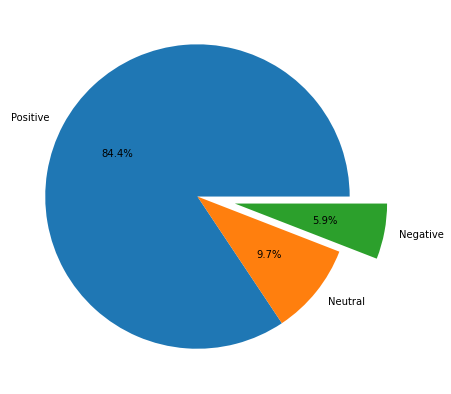

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Analisis de sentimiento usando VADER

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [86]:
# function to analyse 
def vader_analysis(compound):
    if compound > 0:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,The new Spider-Man's solo Marvel debut is a ne...,new Spider Man solo Marvel debut near perfec...,0.309091,Positive,0.8402,Positive
1,"The characters and scenarios are familiar, but...",character scenario familiar loose cool funny...,0.199679,Positive,0.6369,Positive
2,Spidey is finally able to bounce off other fam...,Spidey finally able bounce familiar face res...,0.291667,Positive,-0.3724,Negative
3,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming homecoming character w...,0.333333,Positive,0.2732,Positive
4,The first Spidey flick as ebullient as the com...,first Spidey flick ebullient comic read kid,0.250000,Positive,0.0000,Neutral


In [87]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    319
Neutral      36
Negative     35
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c4056b50>,
 [Text(-1.009028832681373, 0.6495081329880836, 'Positive'),
  Text(0.7227787554868363, -0.829210992822032, 'Neutral'),
  Text(1.0565698921206093, -0.30603931620666697, 'Negative')],
 [Text(-0.5886001523974675, 0.3788797442430487, '81.8%'),
  Text(0.3942429575382744, -0.4522969051756538, '9.2%'),
  Text(0.576310850247605, -0.1669305361127274, '9.0%')])

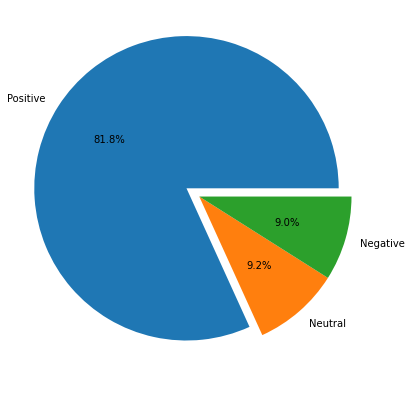

In [88]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

## Analisis using SentiWordNet

In [89]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,The new Spider-Man's solo Marvel debut is a ne...,new Spider Man solo Marvel debut near perfec...,0.309091,Positive,0.8402,Positive,Positive
1,"The characters and scenarios are familiar, but...",character scenario familiar loose cool funny...,0.199679,Positive,0.6369,Positive,Positive
2,Spidey is finally able to bounce off other fam...,Spidey finally able bounce familiar face res...,0.291667,Positive,-0.3724,Negative,Positive
3,Spider-Man: Homecoming is both a homecoming fo...,Spider Man Homecoming homecoming character w...,0.333333,Positive,0.2732,Positive,Positive
4,The first Spidey flick as ebullient as the com...,first Spidey flick ebullient comic read kid,0.250000,Positive,0.0000,Neutral,Positive


In [90]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    308
Negative     48
Neutral      34
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c3fdbdc0>,
 [Text(-0.9475932734076169, 0.7362519868853581, 'Positive'),
  Text(0.653711413268495, -0.8846815179275007, 'Negative'),
  Text(1.059000900009409, -0.2975182242809033, 'Neutral')],
 [Text(-0.5527627428211098, 0.42948032568312555, '79.0%'),
  Text(0.35656986178281547, -0.48255355523318216, '12.3%'),
  Text(0.5776368545505867, -0.16228266778958358, '8.7%')])

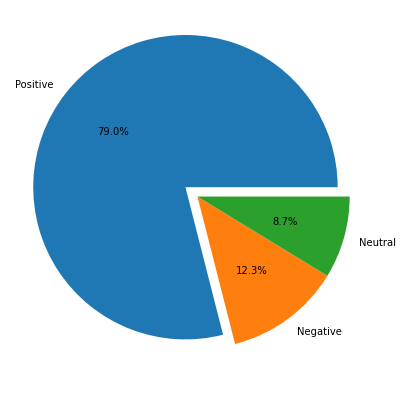

In [91]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

## Comparación entre las tres librerías

([<matplotlib.patches.Wedge at 0x1f6c387f520>,
 [Text(-0.8686271672903155, 0.6748976546449116, 'Positive'),
  Text(0.653711413268495, -0.8846815179275007, 'Negative'),
  Text(1.29968292273882, -0.36513600252656314, 'Neutral')],
 [Text(-0.4737966367038084, 0.36812599344267904, '79.0%'),
  Text(0.35656986178281547, -0.48255355523318216, '12.3%'),
  Text(0.8183188772799977, -0.2299004460352434, '8.7%')])

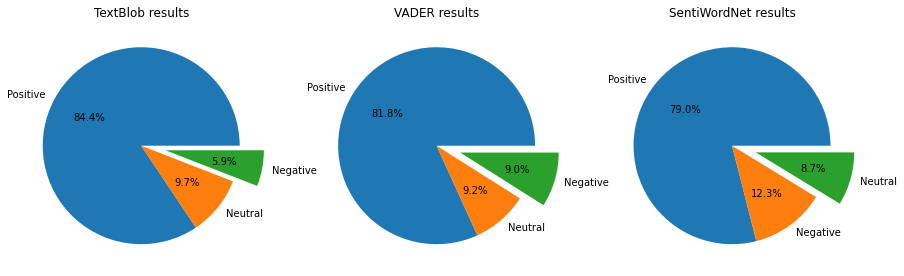

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# The Amazing Spiderman

In [93]:
import pandas as pd
df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/the_amazing_spider_man']
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
634,m/the_amazing_spider_man,Kate Muir,True,Times (UK),Fresh,5-Apr,6/19/2012,Yet another generation will bear the Spiderman...
635,m/the_amazing_spider_man,Nick Curtis,True,London Evening Standard,Rotten,5-Feb,6/19/2012,"Shame. We finally get a British superhero, and..."
636,m/the_amazing_spider_man,Kevin Harley,False,Total Film,Fresh,5-Apr,6/19/2012,"The leads charm, the action crackles and the g..."
637,m/the_amazing_spider_man,Andrew Pulver,True,Guardian,Fresh,5-Apr,6/19/2012,Webb successfully treads a fine line between k...
638,m/the_amazing_spider_man,Robbie Collin,True,Daily Telegraph (UK),Fresh,5-Apr,6/19/2012,The Avengers fans have enough heroes already. ...


In [94]:
dataset = df.drop(['critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score'], axis =1)
dataset.head()

,rotten_tomatoes_link,review_date,review_content
634,m/the_amazing_spider_man,6/19/2012,Yet another generation will bear the Spiderman...
635,m/the_amazing_spider_man,6/19/2012,"Shame. We finally get a British superhero, and..."
636,m/the_amazing_spider_man,6/19/2012,"The leads charm, the action crackles and the g..."
637,m/the_amazing_spider_man,6/19/2012,Webb successfully treads a fine line between k...
638,m/the_amazing_spider_man,6/19/2012,The Avengers fans have enough heroes already. ...


In [95]:
dataset.shape

(332, 3)

In [96]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['review_content'].apply(clean)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews
634,m/the_amazing_spider_man,6/19/2012,Yet another generation will bear the Spiderman...,Yet another generation will bear the Spiderman...
635,m/the_amazing_spider_man,6/19/2012,"Shame. We finally get a British superhero, and...",Shame We finally get a British superhero and h...
636,m/the_amazing_spider_man,6/19/2012,"The leads charm, the action crackles and the g...",The leads charm the action crackles and the gr...
637,m/the_amazing_spider_man,6/19/2012,Webb successfully treads a fine line between k...,Webb successfully treads a fine line between k...
638,m/the_amazing_spider_man,6/19/2012,The Avengers fans have enough heroes already. ...,The Avengers fans have enough heroes already W...


In [97]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    cachedStopWords = set(stopwords.words("english"))
    cachedStopWords.update(('Amazing', 'amazing', 'AMAZING'))
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in cachedStopWords:
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged
634,m/the_amazing_spider_man,6/19/2012,Yet another generation will bear the Spiderman...,Yet another generation will bear the Spiderman...,"[(Yet, r), (another, None), (generation, n), (..."
635,m/the_amazing_spider_man,6/19/2012,"Shame. We finally get a British superhero, and...",Shame We finally get a British superhero and h...,"[(Shame, n), (finally, r), (get, v), (British,..."
636,m/the_amazing_spider_man,6/19/2012,"The leads charm, the action crackles and the g...",The leads charm the action crackles and the gr...,"[(leads, n), (charm, v), (action, n), (crackle..."
637,m/the_amazing_spider_man,6/19/2012,Webb successfully treads a fine line between k...,Webb successfully treads a fine line between k...,"[(Webb, n), (successfully, r), (treads, v), (f..."
638,m/the_amazing_spider_man,6/19/2012,The Avengers fans have enough heroes already. ...,The Avengers fans have enough heroes already W...,"[(Avengers, n), (fans, n), (enough, a), (heroe..."


In [98]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged,Lemma
634,m/the_amazing_spider_man,6/19/2012,Yet another generation will bear the Spiderman...,Yet another generation will bear the Spiderman...,"[(Yet, r), (another, None), (generation, n), (...",Yet another generation bear Spiderman emblem...
635,m/the_amazing_spider_man,6/19/2012,"Shame. We finally get a British superhero, and...",Shame We finally get a British superhero and h...,"[(Shame, n), (finally, r), (get, v), (British,...",Shame finally get British superhero bit boring
636,m/the_amazing_spider_man,6/19/2012,"The leads charm, the action crackles and the g...",The leads charm the action crackles and the gr...,"[(leads, n), (charm, v), (action, n), (crackle...",lead charm action crackle groove well lay pa...
637,m/the_amazing_spider_man,6/19/2012,Webb successfully treads a fine line between k...,Webb successfully treads a fine line between k...,"[(Webb, n), (successfully, r), (treads, v), (f...",Webb successfully tread fine line keep hardc...
638,m/the_amazing_spider_man,6/19/2012,The Avengers fans have enough heroes already. ...,The Avengers fans have enough heroes already W...,"[(Avengers, n), (fans, n), (enough, a), (heroe...",Avengers fan enough hero already thrill see ...


In [99]:
dataset[['review_content', 'Lemma']]

,review_content,Lemma
634,Yet another generation will bear the Spiderman...,Yet another generation bear Spiderman emblem...
635,"Shame. We finally get a British superhero, and...",Shame finally get British superhero bit boring
636,"The leads charm, the action crackles and the g...",lead charm action crackle groove well lay pa...
637,Webb successfully treads a fine line between k...,Webb successfully tread fine line keep hardc...
638,The Avengers fans have enough heroes already. ...,Avengers fan enough hero already thrill see ...
...,...,...
961,The Amazing Spider-Man is enjoyable filled wit...,Spider Man enjoyable fill great moment wonde...
962,A flawed but still solid Spider-Man movie whic...,flawed still solid Spider Man movie deliver ...
963,It shows new things in the Spider-Man universe...,show new thing Spider Man universe time take...
964,"This is fine, but is fine good enough for one ...",fine fine good enough one beloved comic book...


## Analisis de sentimiento usando TextBlob

In [100]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [101]:
fin_data = pd.DataFrame(dataset[['review_content', 'Lemma']])

In [102]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis
634,Yet another generation will bear the Spiderman...,Yet another generation bear Spiderman emblem...,0.491667,Positive
635,"Shame. We finally get a British superhero, and...",Shame finally get British superhero bit boring,-0.333333,Negative
636,"The leads charm, the action crackles and the g...",lead charm action crackle groove well lay pa...,0.100000,Positive
637,Webb successfully treads a fine line between k...,Webb successfully tread fine line keep hardc...,0.616667,Positive
638,The Avengers fans have enough heroes already. ...,Avengers fan enough hero already thrill see ...,0.000000,Neutral


In [103]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    221
Negative     71
Neutral      40
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c3588a90>,
 [Text(-0.5469924679774363, 0.9543580250492755, 'Positive'),
  Text(0.15560958267437372, -1.0889378576300428, 'Negative'),
  Text(1.254444369632414, -0.4988680421690046, 'Neutral')],
 [Text(-0.29835952798769244, 0.5205589227541502, '66.6%'),
  Text(0.08487795418602202, -0.5939661041618415, '21.4%'),
  Text(0.7898353438426309, -0.3141021006249288, '12.0%')])

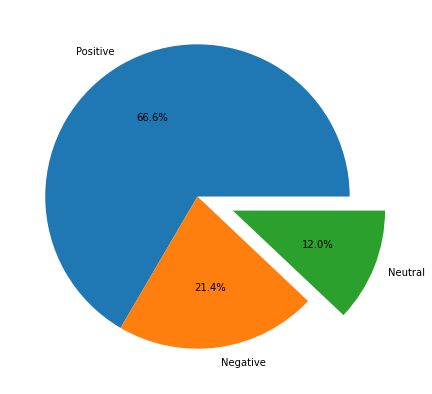

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Analisis de sentimiento usando VADER

In [105]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [106]:
# function to analyse 
def vader_analysis(compound):
    if compound > 0:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
634,Yet another generation will bear the Spiderman...,Yet another generation bear Spiderman emblem...,0.491667,Positive,0.6908,Positive
635,"Shame. We finally get a British superhero, and...",Shame finally get British superhero bit boring,-0.333333,Negative,-0.6597,Negative
636,"The leads charm, the action crackles and the g...",lead charm action crackle groove well lay pa...,0.100000,Positive,0.5859,Positive
637,Webb successfully treads a fine line between k...,Webb successfully tread fine line keep hardc...,0.616667,Positive,0.9062,Positive
638,The Avengers fans have enough heroes already. ...,Avengers fan enough hero already thrill see ...,0.000000,Neutral,0.7003,Positive


In [107]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    241
Negative     59
Neutral      32
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c400c880>,
 [Text(-0.781924917558199, 0.9102710713307349, 'Positive'),
  Text(0.43533383910073403, -1.0101903031279882, 'Negative'),
  Text(1.0499545034600872, -0.3280175920036634, 'Neutral')],
 [Text(-0.45612286857561607, 0.5309914582762619, '72.6%'),
  Text(0.2374548213276731, -0.5510128926152662, '17.8%'),
  Text(0.5727024564327747, -0.17891868654745274, '9.6%')])

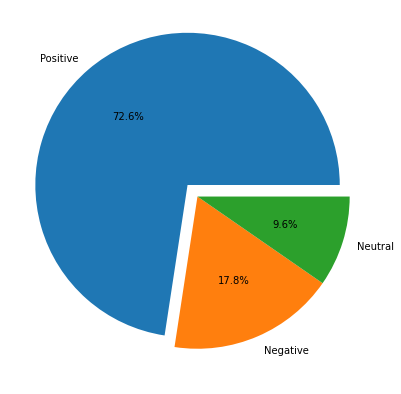

In [108]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

## Analisis using SentiWordNet

In [109]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
634,Yet another generation will bear the Spiderman...,Yet another generation bear Spiderman emblem...,0.491667,Positive,0.6908,Positive,Negative
635,"Shame. We finally get a British superhero, and...",Shame finally get British superhero bit boring,-0.333333,Negative,-0.6597,Negative,Negative
636,"The leads charm, the action crackles and the g...",lead charm action crackle groove well lay pa...,0.100000,Positive,0.5859,Positive,Positive
637,Webb successfully treads a fine line between k...,Webb successfully tread fine line keep hardc...,0.616667,Positive,0.9062,Positive,Positive
638,The Avengers fans have enough heroes already. ...,Avengers fan enough hero already thrill see ...,0.000000,Neutral,0.7003,Positive,Positive


In [110]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    217
Negative     85
Neutral      30
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c407cdf0>,
 [Text(-0.5568942484934014, 1.062952866309212, 'Positive'),
  Text(0.21715098414899883, -1.0783531193830347, 'Negative'),
  Text(1.05597389439078, -0.3080894908385714, 'Neutral')],
 [Text(-0.3248549782878174, 0.6200558386803737, '65.4%'),
  Text(0.11844599135399934, -0.5881926105725643, '25.6%'),
  Text(0.575985760576789, -0.1680488131846753, '9.0%')])

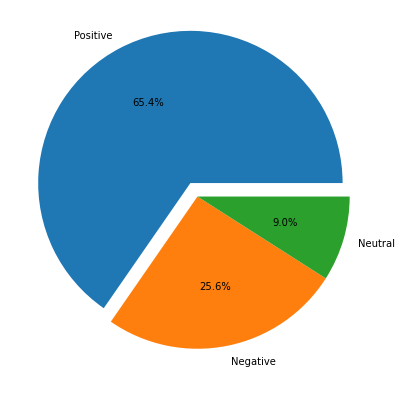

In [111]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

## Comparación entre las tres librerías

([<matplotlib.patches.Wedge at 0x1f6c40d8460>,
 [Text(-0.5104863944522846, 0.9743734607834444, 'Positive'),
  Text(0.21715098414899883, -1.0783531193830347, 'Negative'),
  Text(1.2959679612977753, -0.3781098296655194, 'Neutral')],
 [Text(-0.27844712424670065, 0.531476433154606, '65.4%'),
  Text(0.11844599135399934, -0.5881926105725643, '25.6%'),
  Text(0.8159798274837844, -0.23806915201162332, '9.0%')])

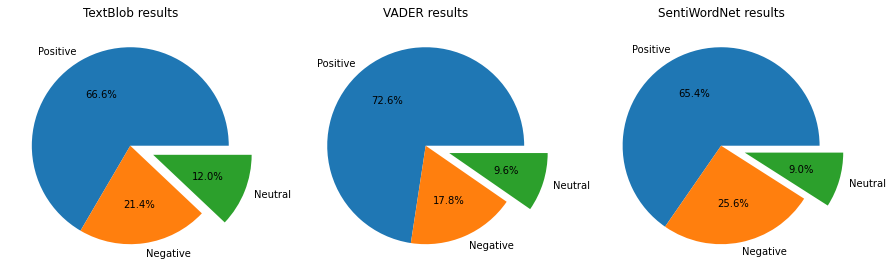

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Spiderman

In [113]:
import pandas as pd
df = pd.read_csv('C:/Users/ameri/OneDrive/Documents/MCD/Tetramestre 4/Preprocesamiento de datos/Tarea 1/dataset.csv')
df = df[df['rotten_tomatoes_link'] == 'm/spiderman']
df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
390,m/spiderman,David Poland,False,Hot Button,Fresh,NaN,4/9/2002,"Once it gets rolling, it gets past the CG prob..."
391,m/spiderman,Moriarty,False,Ain't It Cool Movie Reviews,Fresh,NaN,4/16/2002,[Sam Raimi] has crafted a film here that is co...
392,m/spiderman,Michael Szymanski,False,Zap2it.com,Fresh,4-Apr,4/16/2002,A perfect summer popcorn movie with lots of gr...
393,m/spiderman,Scott A. Mantz,False,Scott Mantz' Movie Reviews,Fresh,5-Mar,4/19/2002,About as good as can be expected for an introd...
394,m/spiderman,Kirk Honeycutt,True,Hollywood Reporter,Fresh,NaN,4/22/2002,Guileless and charming with a perpetual look o...


In [114]:
dataset = df.drop(['critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score'], axis =1)
dataset.head()

,rotten_tomatoes_link,review_date,review_content
390,m/spiderman,4/9/2002,"Once it gets rolling, it gets past the CG prob..."
391,m/spiderman,4/16/2002,[Sam Raimi] has crafted a film here that is co...
392,m/spiderman,4/16/2002,A perfect summer popcorn movie with lots of gr...
393,m/spiderman,4/19/2002,About as good as can be expected for an introd...
394,m/spiderman,4/22/2002,Guileless and charming with a perpetual look o...


In [115]:
dataset.shape

(244, 3)

In [116]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Reviews'] = dataset['review_content'].apply(clean)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews
390,m/spiderman,4/9/2002,"Once it gets rolling, it gets past the CG prob...",Once it gets rolling it gets past the CG probl...
391,m/spiderman,4/16/2002,[Sam Raimi] has crafted a film here that is co...,Sam Raimi has crafted a film here that is com...
392,m/spiderman,4/16/2002,A perfect summer popcorn movie with lots of gr...,A perfect summer popcorn movie with lots of gr...
393,m/spiderman,4/19/2002,About as good as can be expected for an introd...,About as good as can be expected for an introd...
394,m/spiderman,4/22/2002,Guileless and charming with a perpetual look o...,Guileless and charming with a perpetual look o...


In [117]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Reviews'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged
390,m/spiderman,4/9/2002,"Once it gets rolling, it gets past the CG prob...",Once it gets rolling it gets past the CG probl...,"[(gets, v), (rolling, v), (gets, v), (past, No..."
391,m/spiderman,4/16/2002,[Sam Raimi] has crafted a film here that is co...,Sam Raimi has crafted a film here that is com...,"[(Sam, n), (Raimi, n), (crafted, v), (film, n)..."
392,m/spiderman,4/16/2002,A perfect summer popcorn movie with lots of gr...,A perfect summer popcorn movie with lots of gr...,"[(perfect, a), (summer, n), (popcorn, n), (mov..."
393,m/spiderman,4/19/2002,About as good as can be expected for an introd...,About as good as can be expected for an introd...,"[(good, a), (expected, v), (introductory, a), ..."
394,m/spiderman,4/22/2002,Guileless and charming with a perpetual look o...,Guileless and charming with a perpetual look o...,"[(Guileless, n), (charming, v), (perpetual, a)..."


In [118]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

,rotten_tomatoes_link,review_date,review_content,Cleaned Reviews,POS tagged,Lemma
390,m/spiderman,4/9/2002,"Once it gets rolling, it gets past the CG prob...",Once it gets rolling it gets past the CG probl...,"[(gets, v), (rolling, v), (gets, v), (past, No...",get roll get past CG problem plague early sw...
391,m/spiderman,4/16/2002,[Sam Raimi] has crafted a film here that is co...,Sam Raimi has crafted a film here that is com...,"[(Sam, n), (Raimi, n), (crafted, v), (film, n)...",Sam Raimi craft film completely honest comic...
392,m/spiderman,4/16/2002,A perfect summer popcorn movie with lots of gr...,A perfect summer popcorn movie with lots of gr...,"[(perfect, a), (summer, n), (popcorn, n), (mov...",perfect summer popcorn movie lot great effec...
393,m/spiderman,4/19/2002,About as good as can be expected for an introd...,About as good as can be expected for an introd...,"[(good, a), (expected, v), (introductory, a), ...",good expect introductory superhero movie wou...
394,m/spiderman,4/22/2002,Guileless and charming with a perpetual look o...,Guileless and charming with a perpetual look o...,"[(Guileless, n), (charming, v), (perpetual, a)...",Guileless charm perpetual look startled bewi...


In [119]:
dataset[['review_content', 'Lemma']]

,review_content,Lemma
390,"Once it gets rolling, it gets past the CG prob...",get roll get past CG problem plague early sw...
391,[Sam Raimi] has crafted a film here that is co...,Sam Raimi craft film completely honest comic...
392,A perfect summer popcorn movie with lots of gr...,perfect summer popcorn movie lot great effec...
393,About as good as can be expected for an introd...,good expect introductory superhero movie wou...
394,Guileless and charming with a perpetual look o...,Guileless charm perpetual look startled bewi...
...,...,...
629,Tobey Maguire brings to the film a tenderness ...,Tobey Maguire bring film tenderness also wat...
630,"Watching Spider-Man today, it's easy to see wh...",Watching Spider Man today easy see work well...
631,"It's all lightly done, and Raimi never forgets...",lightly do Raimi never forget family friendl...
632,"A true masterpiece, er, make that, web-masterp...",true masterpiece er make web masterpiece


## Analisis de sentimiento usando TextBlob

In [120]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [121]:
fin_data = pd.DataFrame(dataset[['review_content', 'Lemma']])

In [122]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis
390,"Once it gets rolling, it gets past the CG prob...",get roll get past CG problem plague early sw...,0.050000,Positive
391,[Sam Raimi] has crafted a film here that is co...,Sam Raimi craft film completely honest comic...,0.408333,Positive
392,A perfect summer popcorn movie with lots of gr...,perfect summer popcorn movie lot great effec...,0.540000,Positive
393,About as good as can be expected for an introd...,good expect introductory superhero movie wou...,0.650000,Positive
394,Guileless and charming with a perpetual look o...,Guileless charm perpetual look startled bewi...,0.136667,Positive


In [123]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    185
Neutral      37
Negative     22
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c533f970>,
 [Text(-0.797586741076843, 0.7575324352517331, 'Positive'),
  Text(0.5540833400956099, -0.9502587290988139, 'Neutral'),
  Text(1.2962022978949927, -0.3773057154771717, 'Negative')],
 [Text(-0.4350473133146416, 0.4131995101373089, '75.8%'),
  Text(0.30222727641578717, -0.5183229431448075, '15.2%'),
  Text(0.8161273727486992, -0.237562857893034, '9.0%')])

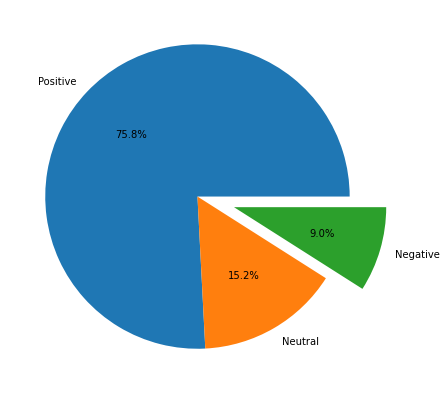

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## Analisis de sentimiento usando VADER

In [125]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [126]:
# function to analyse 
def vader_analysis(compound):
    if compound > 0:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
390,"Once it gets rolling, it gets past the CG prob...",get roll get past CG problem plague early sw...,0.050000,Positive,0.0516,Positive
391,[Sam Raimi] has crafted a film here that is co...,Sam Raimi craft film completely honest comic...,0.408333,Positive,0.7340,Positive
392,A perfect summer popcorn movie with lots of gr...,perfect summer popcorn movie lot great effec...,0.540000,Positive,0.9747,Positive
393,About as good as can be expected for an introd...,good expect introductory superhero movie wou...,0.650000,Positive,0.7783,Positive
394,Guileless and charming with a perpetual look o...,Guileless charm perpetual look startled bewi...,0.136667,Positive,0.8625,Positive


In [127]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    201
Neutral      23
Negative     20
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c554f760>,
 [Text(-1.0207386620890118, 0.6309457850851642, 'Positive'),
  Text(0.7575322672319308, -0.7975869006587626, 'Neutral'),
  Text(1.0637304455660208, -0.28013842859542654, 'Negative')],
 [Text(-0.5954308862185902, 0.3680517079663458, '82.4%'),
  Text(0.413199418490144, -0.435047400359325, '9.4%'),
  Text(0.580216606672375, -0.152802779233869, '8.2%')])

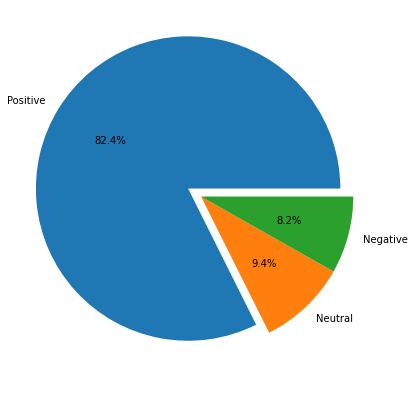

In [128]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

## Analisis using SentiWordNet

In [129]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\ameri\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,review_content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
390,"Once it gets rolling, it gets past the CG prob...",get roll get past CG problem plague early sw...,0.050000,Positive,0.0516,Positive,Negative
391,[Sam Raimi] has crafted a film here that is co...,Sam Raimi craft film completely honest comic...,0.408333,Positive,0.7340,Positive,Positive
392,A perfect summer popcorn movie with lots of gr...,perfect summer popcorn movie lot great effec...,0.540000,Positive,0.9747,Positive,Positive
393,About as good as can be expected for an introd...,good expect introductory superhero movie wou...,0.650000,Positive,0.7783,Positive,Positive
394,Guileless and charming with a perpetual look o...,Guileless charm perpetual look startled bewi...,0.136667,Positive,0.8625,Positive,Positive


In [130]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    180
Negative     41
Neutral      22
0             1
Name: SWN analysis, dtype: int64

In [131]:
fin_data = fin_data.drop(fin_data[fin_data['SWN analysis']==0].index)
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    180
Negative     41
Neutral      22
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1f6c5282700>,
 [Text(-0.8234898988542124, 0.8728484327104443, 'Positive'),
  Text(0.5000228665118189, -0.979784227759002, 'Negative'),
  Text(1.055805734460897, -0.3086652735237406, 'Neutral')],
 [Text(-0.4803691076649572, 0.5091615857477592, '74.1%'),
  Text(0.27273974537008305, -0.5344277605958192, '16.9%'),
  Text(0.5758940369786711, -0.16836287646749487, '9.1%')])

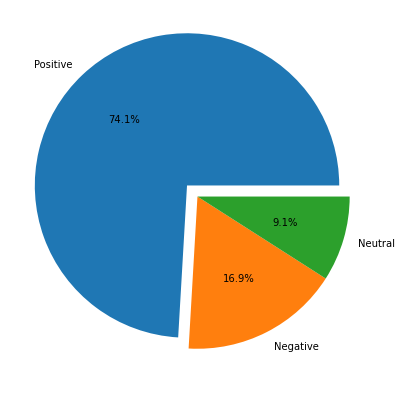

In [132]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

## Comparación entre las tres librerías

([<matplotlib.patches.Wedge at 0x1f6c5508e80>,
 [Text(-0.7548657406163614, 0.8001110633179073, 'Positive'),
  Text(0.5000228665118189, -0.979784227759002, 'Negative'),
  Text(1.29576158320201, -0.3788164720518635, 'Neutral')],
 [Text(-0.41174494942710615, 0.4364242163552221, '74.1%'),
  Text(0.27273974537008305, -0.5344277605958192, '16.9%'),
  Text(0.8158498857197841, -0.23851407499561772, '9.1%')])

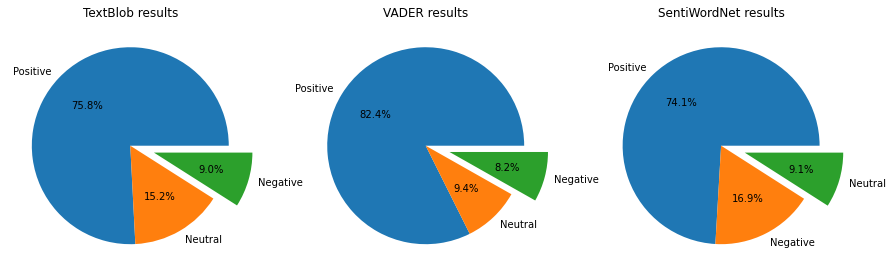

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)